In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read atlases

In [2]:
#ProteomicsDB
db = pd.read_csv('proteomicsdb.csv')
#NSAFatlases
ms_atlas_no_abundant = pd.read_csv('ms_atlas_no_abundant_sorted.csv', sep=',')
ms_atlas_filter_no_abundant = pd.read_csv('ms_atlas_filter_no_abundant_sorted.csv', sep=',')
ms_atlas = pd.read_csv('ms_atlas_sorted.csv', sep=',')
ms_atlas_filter = pd.read_csv('ms_atlas_filter_sorted.csv', sep=',')

In [3]:
ms_atlas_no_abundant = ms_atlas_no_abundant.rename(columns={'uniprot_id': 'Uniprot_id'})
ms_atlas_filter_no_abundant = ms_atlas_filter_no_abundant.rename(columns={'uniprot_id': 'Uniprot_id'})
ms_atlas = ms_atlas.rename(columns={'uniprot_id': 'Uniprot_id'})
ms_atlas_filter = ms_atlas_filter.rename(columns={'uniprot_id': 'Uniprot_id'})
db = db.rename(columns={'UniProt': 'Uniprot_id'})


In [4]:
ms_atlas_no_abundant = ms_atlas_no_abundant.dropna() 
ms_atlas_filter_no_abundant = ms_atlas_filter_no_abundant.dropna() 
ms_atlas = ms_atlas.dropna() 
ms_atlas_filter = ms_atlas_filter.dropna() 
db = db.dropna()

In [5]:
#add randomised numbers for comparisons
ms_atlas['NSAF_random'] = np.random.uniform(low=0, high=1, size=ms_atlas.shape[0])
ms_atlas_filter['NSAF_random'] = np.random.uniform(low=0, high=1, size=ms_atlas_filter.shape[0])
ms_atlas_no_abundant['NSAF_random'] = np.random.uniform(low=0, high=1, size=ms_atlas_no_abundant.shape[0])
ms_atlas_filter_no_abundant['NSAF_random'] = np.random.uniform(low=0, high=1, size=ms_atlas_filter_no_abundant.shape[0])

### Comparison on organ level

In [ ]:
#real NSAF datasets
comp = pd.DataFrame(columns=['comparison', 'level','spearman (mean)', 'spearman (stdev)' ])
hpa_atlases = [db,]
hpa_names = ['ProteomicsDB']
hpa_values = ['normalised intensity']

protein_expression_atlases = [ms_atlas, ms_atlas_filter, ms_atlas_no_abundant, ms_atlas_filter_no_abundant]
protein_expression_names = ['PexAt', 'fPexAt', 'PexAt_abundant', 'fPexAt_abundant']
i = 0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['NSAF'].notna()]
        
        #first comparison on organ level
        organ = df['Organ_id'].unique()
        row.append('Organ')
        organsDict = {elem : pd.DataFrame for elem in organ}
        for key in organsDict.keys():
            organsDict[key] = df[:][df['Organ_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the NSAF and expression level value
        ps_list = []
        spearman_list = []

        for key in organsDict.keys():
            spearman = organsDict[key]['NSAF'].corr(organsDict[key][hpa_value], method = 'spearman')
            spearman_list.append(spearman)
        list_of_corrs = [spearman_list]
        names = ['spearman']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp.loc[len(comp)] = row


In [ ]:
#randomised NSAF datasets
hpa_atlases = [db,]
hpa_names = ['ProteomicsDB']
hpa_values = ['normalised intensity']

protein_expression_atlases = [ms_atlas, ms_atlas_filter, ms_atlas_no_abundant, ms_atlas_filter_no_abundant]
protein_expression_names = ['random PexAt', 'random fPexAt', 'random PexAt_abundant', 'random fPexAt_abundant']
i = 0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['NSAF_random'].notna()]
        
        #first comparison on organ level
        organ = df['Organ_id'].unique()
        row.append('Organ')
        organsDict = {elem : pd.DataFrame for elem in organ}
        for key in organsDict.keys():
            organsDict[key] = df[:][df['Organ_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the NSAF_random and expression level value
        ps_list = []
        spearman_list = []

        for key in organsDict.keys():
            spearman = organsDict[key]['NSAF_random'].corr(organsDict[key][hpa_value], method = 'spearman')
            spearman_list.append(spearman)
        list_of_corrs = [spearman_list]
        names = ['spearman']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp.loc[len(comp)] = row


[Text(0, 0, 'ProteomicsDB - PexAt'),
 Text(0, 0, 'ProteomicsDB - fPexAt'),
 Text(0, 0, 'ProteomicsDB - PexAt_abundant'),
 Text(0, 0, 'ProteomicsDB - fPexAt_abundant'),
 Text(0, 0, 'ProteomicsDB - random PexAt'),
 Text(0, 0, 'ProteomicsDB - random fPexAt'),
 Text(0, 0, 'ProteomicsDB - random PexAt_abundant'),
 Text(0, 0, 'ProteomicsDB - random fPexAt_abundant')]

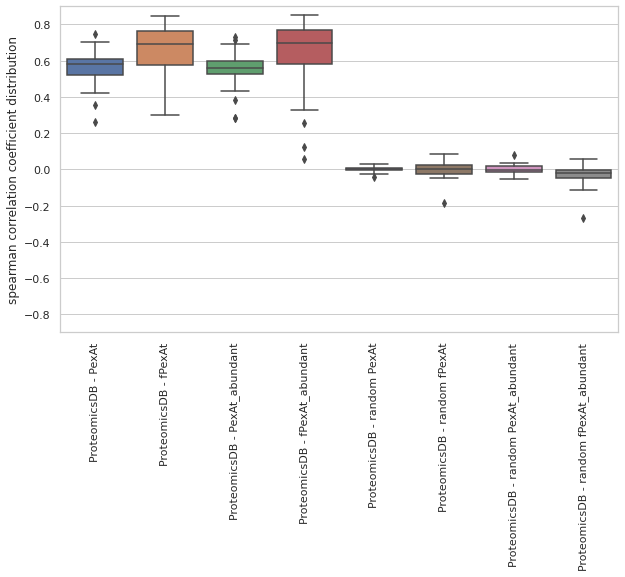

In [9]:
all_arrays = comp['spearman (mean)'].to_list()
comparisons = comp['comparison'].to_list()
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(ax=ax, data=all_arrays)
ax.set(ylabel='spearman correlation coefficient distribution')
ax.set(ylim=(-0.9,0.9))
ax.set_xticklabels(comparisons, rotation=90)
#ax.set_title("spearman correlation coefficient distribution over organs comparing HPA and MS protein expression")

### Comparison on Protein level

In [10]:
#real NSAF datasets
comp2 = pd.DataFrame(columns=['comparison', 'level', 'spearman (mean)', 'spearman (stdev)' ])

hpa_atlases = [db,]
hpa_names = ['ProteomicsDB']
hpa_values = ['normalised intensity']

protein_expression_atlases = [ms_atlas, ms_atlas_filter, ms_atlas_no_abundant, ms_atlas_filter_no_abundant]
protein_expression_names = ['PexAt', 'fPexAt', 'PexAt_abundant', 'fPexAt_abundant']
i=0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        i += 1
        plt.figure(i)
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['NSAF'].notna()]
        #second comparison on protein level
        proteins = df['Uniprot_id'].unique()
        row.append('Protein')
        proteinsDict = {elem : pd.DataFrame for elem in proteins}
        for key in proteinsDict.keys():
            proteinsDict[key] = df[:][df['Uniprot_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the NSAF and expression level value
        ps_list = []
        spearman_list = []

        for key in proteinsDict.keys():
            spearman = proteinsDict[key]['NSAF'].corr(proteinsDict[key][hpa_value], method = 'spearman')
            spearman_list.append(spearman)
        list_of_corrs = [spearman_list]
        names = ['spearman']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp2.loc[len(comp2)] = row

comparison of ProteomicsDB and PexAt


/home/compomics/.local/lib/python3.6/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


comparison of ProteomicsDB and fPexAt
comparison of ProteomicsDB and PexAt_abundant
comparison of ProteomicsDB and fPexAt_abundant


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
#randomised NSAF datasets
hpa_atlases = [db,]
hpa_names = ['ProteomicsDB']
hpa_values = ['normalised intensity']

protein_expression_atlases = [ms_atlas, ms_atlas_filter, ms_atlas_no_abundant, ms_atlas_filter_no_abundant]
protein_expression_names = ['random PexAt', 'random fPexAt', 'random PexAt_abundant', 'random fPexAt_abundant']
i=0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        i += 1
        plt.figure(i)
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['NSAF_random'].notna()]
        #second comparison on protein level
        proteins = df['Uniprot_id'].unique()
        row.append('Protein')
        proteinsDict = {elem : pd.DataFrame for elem in proteins}
        for key in proteinsDict.keys():
            proteinsDict[key] = df[:][df['Uniprot_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the NSAF_random and expression level value
        ps_list = []
        spearman_list = []

        for key in proteinsDict.keys():
            spearman = proteinsDict[key]['NSAF_random'].corr(proteinsDict[key][hpa_value], method = 'spearman')
            spearman_list.append(spearman)
        list_of_corrs = [spearman_list]
        names = ['spearman']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp2.loc[len(comp2)] = row

comparison of ProteomicsDB and random PexAt
comparison of ProteomicsDB and random fPexAt
comparison of ProteomicsDB and random PexAt_abundant
comparison of ProteomicsDB and random fPexAt_abundant


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
comp2

,comparison,level,spearman (mean),spearman (stdev)
0,ProteomicsDB - PexAt,Protein,"[0.5482040667314768, 0.2574257598824511, 0.711...",0.449197
1,ProteomicsDB - fPexAt,Protein,"[0.4665397083248459, 0.4071929290505081, 0.180...",0.531634
2,ProteomicsDB - PexAt_abundant,Protein,"[0.33276591579035836, 0.28639532545326823, 0.7...",0.450603
3,ProteomicsDB - fPexAt_abundant,Protein,"[0.43930124750866034, 0.4071929290505081, 0.16...",0.530568
4,ProteomicsDB - random PexAt,Protein,"[-0.06641052351608168, -0.2922625792397628, 0....",0.438946
5,ProteomicsDB - random fPexAt,Protein,"[-0.07968871125687638, 0.02395252523826518, -0...",0.562610
6,ProteomicsDB - random PexAt_abundant,Protein,"[-0.24165047380537347, -0.001833516808279566, ...",0.440585
7,ProteomicsDB - random fPexAt_abundant,Protein,"[-0.14794699699267486, 0.5030030300035688, -0....",0.563770


[Text(0, 0, 'ProteomicsDB - PexAt'),
 Text(0, 0, 'ProteomicsDB - fPexAt'),
 Text(0, 0, 'ProteomicsDB - PexAt_abundant'),
 Text(0, 0, 'ProteomicsDB - fPexAt_abundant'),
 Text(0, 0, 'ProteomicsDB - random PexAt'),
 Text(0, 0, 'ProteomicsDB - random fPexAt'),
 Text(0, 0, 'ProteomicsDB - random PexAt_abundant'),
 Text(0, 0, 'ProteomicsDB - random fPexAt_abundant')]

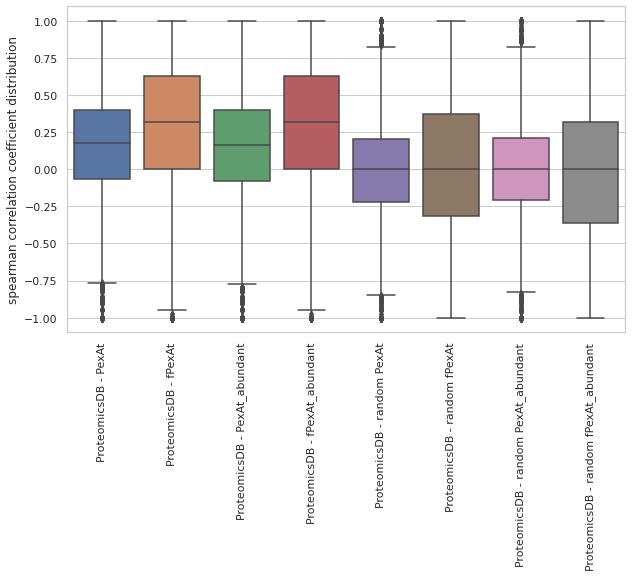

In [13]:
all_arrays = comp2['spearman (mean)'].to_list()
comparisons = comp2['comparison'].to_list()
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(ax=ax, data=all_arrays)
ax.set(ylabel='spearman correlation coefficient distribution')
ax.set_xticklabels(comparisons, rotation=90)
#ax.set_title("spearman correlation coefficient distribution over proteins comparing HPA and MS protein expression")